<a href="https://colab.research.google.com/github/rafiqulcse/Natural-Language-Processing-Project/blob/main/Pegasus_with_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Colab Link: https://colab.research.google.com/drive/1TE5em3J_rUr3znyWYKeRbrflvfZDs90F?usp=sharing

In [3]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [4]:
pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.0 MB/s eta 0:00:00


In [5]:
!pip install sentencepiece
!wget https://raw.githubusercontent.com/google/sentencepiece/master/data/botchan.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.8 MB/s eta 0:00:00
--2023-10-05 08:42:19--  https://raw.githubusercontent.com/google/sentencepiece/master/data/botchan.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278779 (272K) [text/plain]
Saving to: ‘botchan.txt’

botchan.txt         100%[===================>] 272.25K  --.-KB/s    in 0.01s   

2023-10-05 08:42:19 (18.5 MB/s) - ‘botchan.txt’ saved [278779/278779]



In [6]:
import pandas as pd

In [7]:
github_url = "https://raw.githubusercontent.com/rafiqulcse/Natural-Language-Processing-Project/main/Dataset/NLP-project-dataset.csv"

df = pd.read_csv(github_url)
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,0
3,for your own benefit you may want read living ...,1
4,you should all sit down together and watch the...,0


In [22]:
# Get the first element of the first row and convert it to a string
first_element = str(df.iloc[1][0])
print(first_element)

buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke basically advocating that should rid ourselves material possessions fact distinctly remembered jesus making someone cry because that someone asked what achieve salvation and jesus replied with live like buddhist very very roughly translated also point out that buddha rarel

In [9]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

In [10]:
from transformers import PegasusTokenizer
tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-large')

In [11]:
model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
print(len(df))

2000


In [25]:
new_list = []

for i in range(len(df)):
  first_element = str(df.iloc[i][0])

  tokens = tokenizer(first_element, truncation=True, padding="longest", return_tensors="pt")
  summary = model.generate(**tokens)

  summary = tokenizer.decode(summary[0])
  new_list.append(summary)

In [13]:
#tokens = tokenizer(content, truncation=True, padding="longest", return_tensors="pt")

In [17]:
#summary = model.generate(**tokens)

#summary = tokenizer.decode(summary[0])

In [18]:
#print(summary)

<pad>family mormon have never tried explain them they still puzzled stare at time Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair Aupair</s>


In [ ]:
df['Summary'] = new_list

In [33]:
texts = []
labels = []

for i in range(len(df)):
  texts.append(df.loc[i][2])
  labels.append(df.loc[i][1])


In [28]:
pip install tensorflow nltk

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split


In [31]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
    return " ".join(filtered_tokens)

preprocessed_texts = [preprocess_text(text) for text in texts]


In [35]:
max_sequence_length = 100  # Set your desired maximum sequence length

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_texts)

sequences = tokenizer.texts_to_sequences(preprocessed_texts)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)


In [36]:
padded_sequences

array([[   0,    0,    0, ...,   20,  449,  618],
       [ 148,  708,  163, ...,    2, 1078, 1606],
       [   0,    0,    0, ...,    7, 1610,  351],
       ...,
       [   0,    0,    0, ...,  815,   49, 2050],
       [   0,    0,    0, ...,  172,   21,  638],
       [   0,    0,    0, ...,  624,  134,  157]], dtype=int32)

# **Split the data into training and testing sets**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


# **Define the CNN model**

In [38]:
embedding_dim = 50
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# **Compile the model**

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Train the model**

In [40]:
import numpy as np

# Convert your lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
batch_size = 32
epochs = 10

# Then, you can use model.fit as before
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/10
45/45 [==============================] - 21s 238ms/step - loss: 0.6281 - accuracy: 0.6812 - val_loss: 0.6489 - val_accuracy: 0.6562
Epoch 2/10
45/45 [==============================] - 6s 137ms/step - loss: 0.5887 - accuracy: 0.6812 - val_loss: 0.6544 - val_accuracy: 0.6562
Epoch 3/10
45/45 [==============================] - 9s 209ms/step - loss: 0.4226 - accuracy: 0.7667 - val_loss: 0.6038 - val_accuracy: 0.7375
Epoch 4/10
45/45 [==============================] - 4s 80ms/step - loss: 0.1825 - accuracy: 0.9410 - val_loss: 0.8093 - val_accuracy: 0.7125
Epoch 5/10
45/45 [==============================] - 6s 135ms/step - loss: 0.0879 - accuracy: 0.9701 - val_loss: 0.8636 - val_accuracy: 0.7125
Epoch 6/10
45/45 [==============================] - 4s 75ms/step - loss: 0.0533 - accuracy: 0.9861 - val_loss: 0.9332 - val_accuracy: 0.7000
Epoch 7/10
45/45 [==============================] - 4s 89ms/step - loss: 0.0361 - accuracy: 0.9882 - val_loss: 1.0513 - val_accuracy: 0.7375
Epoch 8/

# **Evaluate the model**

In [41]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")


13/13 [==============================] - 0s 5ms/step - loss: 1.3379 - accuracy: 0.6950
Test loss: 1.3379, Test accuracy: 0.6950


# **Matrics**

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [43]:
y_pred1 = model.predict(X_train)
y_pred1 = [1 if pred > 0.5 else 0 for pred in y_pred1]  # Convert probabilities to binary labels

accuracy = accuracy_score(y_train, y_pred1)
cm1 = confusion_matrix(y_train, y_pred1)

50/50 [==============================] - 0s 2ms/step


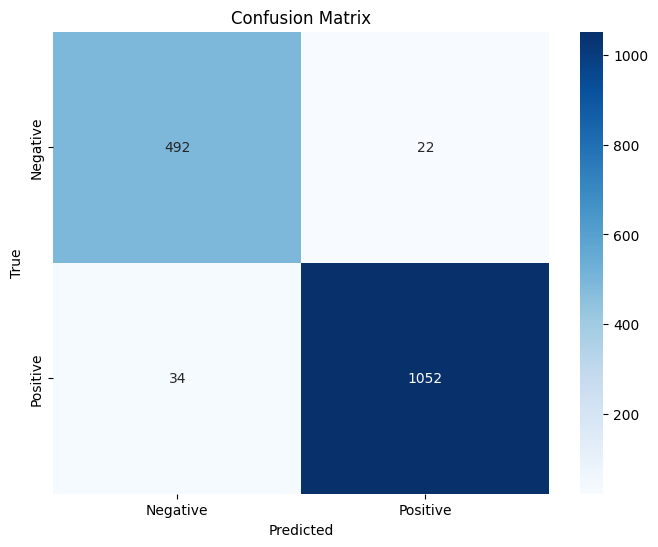

In [44]:
import seaborn as sns
# Function to plot confusion matrix with numbers

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

labels = ['Negative', 'Positive']  # Define your class labels
plot_confusion_matrix(cm1, labels)

In [45]:
y_pred = model.predict(X_test)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]  # Convert probabilities to binary labels

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

13/13 [==============================] - 0s 2ms/step


In [46]:
cm

array([[ 62,  76],
       [ 46, 216]])

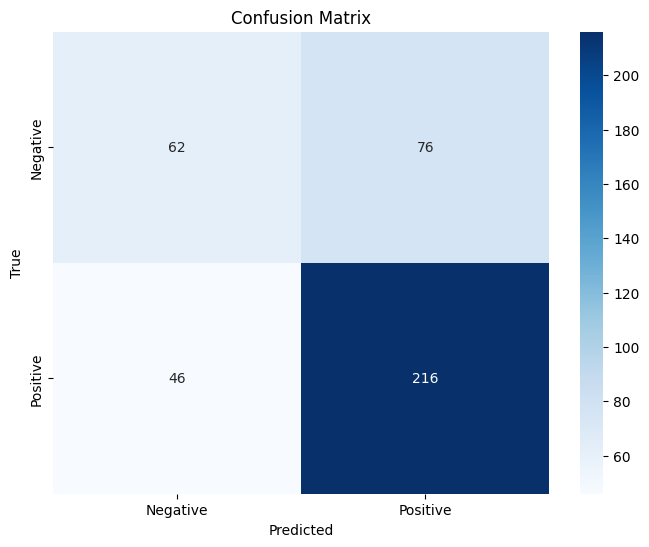

In [47]:
import seaborn as sns
# Function to plot confusion matrix with numbers

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

labels = ['Negative', 'Positive']  # Define your class labels
plot_confusion_matrix(cm, labels)